In [1]:
import re
import numpy as np
from statistics import mean, stdev
import matplotlib.pyplot as plt
from bento_bench import bar_plot, parse_elapsed_secs
import pandas as pd
import seaborn as sns
fsl = ["Bento-fs", "Bento-user", "Bento-prov", "ext4-ordered", "ext4-journal"]
tl = [1, 18]
ops_workloads = ["createfiles_1t.f", "deletefiles_1t.f", "fileserver.f", "varmail.f", "webserver.f"]
fb_ops_regex = "\d*.\d*(?=\sops\/s)"
fb_mbs_regex = "(?<=rd\/wr\s)\d*.\d*(?=mb\/s)"

{'Bento-fs': [4.126, 3.606], 'Bento-prov': [5.022, 3.77], 'ext4-ordered': [5.272, 4.52], 'ext4-journal': [12.014, 10.538]}
{'Bento-fs': [1.77, 0.476], 'Bento-user': [17.580000000000002, 0.8160000000000001], 'Bento-prov': [1.8900000000000001, 0.49], 'ext4-ordered': [1.156, 0.442], 'ext4-journal': [1.246, 0.428]}


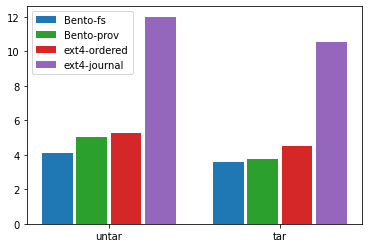

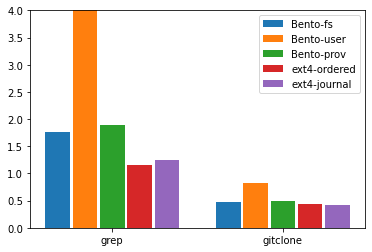

In [12]:
otherapps_1 = ["untar", "tar"]
otherapps_2 = ["grep", "gitclone"]
otherapps_1_avg = {}
otherapps_1_std = {}
otherapps_2_avg = {}
otherapps_2_std = {}
fsl_tar = ["Bento-fs", "Bento-prov", "ext4-ordered", "ext4-journal"]
for fs in fsl:
	otherapps_2_avg[fs] = []
	otherapps_2_std[fs] = []
	for app in otherapps_2:
		tmp = []
		dir = "./results/" + fs + "/" + app
		for f in os.listdir(dir):
			i = int(f.split("_")[1])
			fr = open(dir + "/" + f, 'r')
			t = fr.read()
			fr.close()
			matches = re.findall("\d*:\d*.\d*(?=elapsed)", t)
			tmp.append(parse_elapsed_secs(matches[0]))
		otherapps_2_avg[fs].append(mean(tmp))
		otherapps_2_std[fs].append(stdev(tmp))

	if fs == "Bento-user": continue # Bento-user tar is broken

	otherapps_1_avg[fs] = []
	otherapps_1_std[fs] = []
	for app in otherapps_1:
		tmp = []
		dir = "./results/" + fs + "/" + app
		for f in os.listdir(dir):
			i = int(f.split("_")[1])
			fr = open(dir + "/" + f, 'r')
			t = fr.read()
			fr.close()
			matches = re.findall("\d*:\d*.\d*(?=elapsed)", t)
			tmp.append(parse_elapsed_secs(matches[0]))
		otherapps_1_avg[fs].append(mean(tmp))
		otherapps_1_std[fs].append(stdev(tmp))

fig, ax = plt.subplots()
bar_plot(ax, otherapps_1_avg, fsl_tar, yerr=otherapps_1_std, colors=['#1f77b4', '#2ca02c', '#d62728', '#9467bd'], total_width=.8, single_width=.9)
plt.xticks(range(len(otherapps_1)), otherapps_1)
plt.savefig("./plots/untartar.png")

fig, ax = plt.subplots()
bar_plot(ax, otherapps_2_avg, fsl, yerr=otherapps_2_std, total_width=.8, single_width=.9)
plt.xticks(range(len(otherapps_2)), otherapps_2)
plt.ylim(0, 4)
plt.savefig("./plots/grepgitclone.png")

{'Bento-fs': [0.9926589909886193, 1.1546876584006456], 'Bento-user': [0.1588775868777594, 2.472330903364149], 'Bento-prov': [0.2474608663110865, 0.24133819897776937], 'ext4-ordered': [1.9731891647964215, 1.7608300178595575], 'ext4-journal': [2.507691171117537, 1.5378094568665048]}
Bento-fs
0
Bento-fs
1
Bento-user
0
Bento-user
1
Bento-prov
0
Bento-prov
1
ext4-ordered
0
ext4-ordered
1
ext4-journal
0
ext4-journal
1
Bento-fs
0
Bento-fs
1
Bento-user
0
Bento-user
1
Bento-prov
0
Bento-prov
1
ext4-ordered
0
ext4-ordered
1
ext4-journal
0
ext4-journal
1


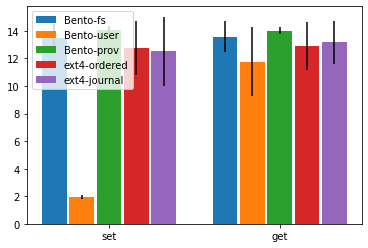

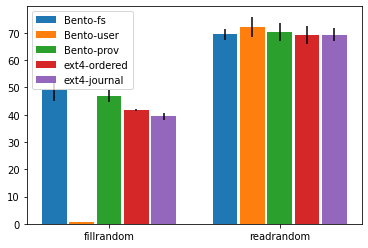

In [2]:
redis = ["set", "get"]
rocksdb = ["fillrandom", "readrandom"]
redis_avg = {}
redis_std = {}
rocksdb_avg = {}
rocksdb_std = {}

for fs in fsl:
	redis_avg[fs] = []
	redis_std[fs] = []
	tmp_set = []
	tmp_get = []
	dir = "./results/" + fs + "/redis"
	for f in os.listdir(dir):
		i = int(f.split("_")[1])
		fr = open(dir + "/" + f, 'r')
		t = fr.read()
		fr.close()
		matches = re.findall("\d*.\d*(?= requests per second)", t)
		tmp_set.append(float(matches[0]) * 0.0001) # convert
		tmp_get.append(float(matches[1]) * 0.0001) # convert
	redis_avg[fs].append(mean(tmp_set))
	redis_std[fs].append(stdev(tmp_set))
	redis_avg[fs].append(mean(tmp_get))
	redis_std[fs].append(stdev(tmp_get))

	rocksdb_avg[fs] = []
	rocksdb_std[fs] = []
	tmp_fillrandom = []
	tmp_readrandom = []
	dir = "./results/" + fs + "/rocksdb"
	for f in os.listdir(dir):
		i = int(f.split("_")[1])
		fr = open(dir + "/" + f, 'r')
		t = fr.read()
		fr.close()
		matches = re.findall("\d*.\d*(?= MB/s)", t)
		tmp_fillrandom.append(float(matches[0]))
		tmp_readrandom.append(float(matches[1]))
	rocksdb_avg[fs].append(mean(tmp_fillrandom))
	rocksdb_std[fs].append(stdev(tmp_fillrandom))
	rocksdb_avg[fs].append(mean(tmp_readrandom))
	rocksdb_std[fs].append(stdev(tmp_readrandom))

print(redis_std)

fig, ax = plt.subplots()
#bax = brokenaxes(ylims=((0, 10), (25, 50), (150, 170)), hspace=.1)
bar_plot(ax, redis_avg, fsl, yerr=redis_std, total_width=.8, single_width=.9)
plt.xticks(range(len(redis)), redis)
plt.savefig("./plots/redis.png")

fig, ax = plt.subplots()
#bax = brokenaxes(ylims=((0, 10), (25, 50), (150, 170)), hspace=.1)
bar_plot(ax, rocksdb_avg, fsl, yerr=rocksdb_std, total_width=.8, single_width=.9)
plt.xticks(range(len(rocksdb)), rocksdb)
plt.savefig("./plots/rocksdb.png")

In [4]:
fbresults = pd.DataFrame(columns=["fs", "workload", "T", "i", "r"])
for fs in ["Bento-fs", "Bento-prov"]:
	fbfsresdir = "./results/" + fs + "/filebenches/"
	for f in os.listdir(fbfsresdir):
		fresdir = fbfsresdir + f
		for r in os.listdir(fresdir):
			rfile = open(fresdir + "/" + r)
			rtext = rfile.read()
			rfile.close()

			regex = ""
			if f in ops_workloads:
				regex = fb_ops_regex
			else:
				regex = fb_mbs_regex

			matches = re.findall(regex, rtext)

			T = ""
			if "1t" in f:
				(T, i) = r.split("_")
			else:
				i = r
			fbresults = fbresults.append({"fs": fs,
						       "workload": f,
						       "T": T,
						       "i": i,
						       "r": float(matches[0])},
						      ignore_index=True)

fbavg_cols = ["Workload"]
for fs in ["Bento-fs", "Bento-prov"]:
	fbavg_cols.append(fs)

fbavg = pd.DataFrame(columns=fbavg_cols)
for w in fbresults["workload"].unique():
	d = fbresults[fbresults["workload"] == w]
	w = w.split(".")[0] # remove the file extension
	for T in d["T"].unique():
		wT = w
		if T != "":
			wT += ", T=" + T

		row = { "Workload": wT }
		for fs in ["Bento-fs", "Bento-prov"]:
			d2 = d[d["fs"] == fs]
			r = str(round(d2["r"].mean(), 2))
			if len(d) > 1:
				r += " (" + str(round(d2["r"].std(), 2)) + ")"
			row[fs] = r
		fbavg = fbavg.append(row, ignore_index=True)

print(fbavg.to_latex(index=False))

\begin{tabular}{lll}
\toprule
             Workload &    Bento-fs & Bento-prov \\
\midrule
              varmail &   1.1 (0.0) &  1.1 (0.0) \\
rand\_read\_1t\_4k, T=18 & 3.35 (3.95) &  2.1 (0.0) \\
 rand\_read\_1t\_4k, T=1 & 3.35 (3.95) &  2.1 (0.0) \\
\bottomrule
\end{tabular}

